<a href="https://colab.research.google.com/github/jeosol/tfx-tutorials/blob/main/Find_square_bounding_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function to generate a square that bounds k points

In [26]:
import heapq 
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 



In [51]:
X, y = make_blobs(n_samples=100, centers=1, n_features=2, random_state=0)

In [52]:
X[0]

array([0.11504439, 6.21385228])

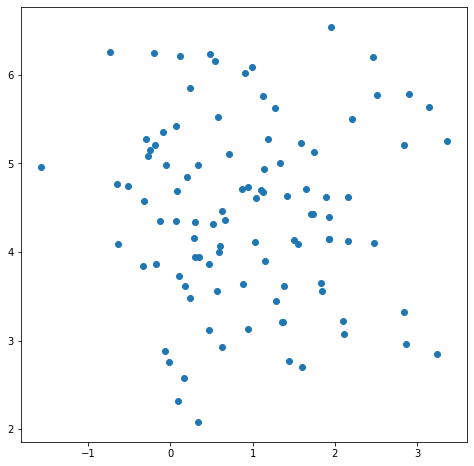

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[:][0], X[:][1])

In [67]:
X[0]

array([0.11504439, 6.21385228])

In [179]:
import math
from typing import List 

def distance(point, center):
    return math.sqrt((point[0]-center[0])**2.0 + (point[1]-center[1])**2.0)


def find_square_coords(k : int = 10):
  X, _, center = make_blobs(n_samples=100, centers=1, n_features=2, random_state=0, return_centers=True)
  #X, _, center = make_blobs(n_samples=100, centers=1, n_features=2, return_centers=True)
  center = center[0]
  print(X[1:5][:])
  print(center)
  #center = np.mean(X.transpose(), axis=1)
  min_x = float('inf')
  max_x = float('-inf')
  min_y = float('inf')
  max_y = float('-inf')
  # maintain diagonal
  max_heap : List[int] = []
  counter_main = 0
  counter_inner= 0
  for x in X:
    heapq.heappush(max_heap, (-distance(x, center), x))
    counter_main += 1 
    #heapq.heapush(min_heap, (-distance(x, center), x))
    
    if len(max_heap) == k + 1:
      # remove a point, point removed is always the furthest point
      heapq.heappop(max_heap)
      counter_inner += 1 
  print(counter_main, counter_inner, counter_main - counter_inner)
  heap_pts = []
  while max_heap:
    _, (pt_x, pt_y) = heapq.heappop(max_heap)
    heap_pts.append([pt_x, pt_y])
    # track the extreme corner points in the heap
    max_x = max(max_x, pt_x)
    max_y = max(max_y, pt_y)
    min_x = min(min_x, pt_x)
    min_y = min(min_y, pt_y)
  
  # the above points gives us a rectangle

  # we can convert it to square by choosing the longer side
  # and extend shorter side along coordinate
  # compute dx and dy
  dx = abs(max_x - min_x)
  dy = abs(max_y - min_y)

  # if dx > dy, # extend max_y by the difference
  if dx > dy:
    max_y = max_y + dx - dy
  if dy > dx: # reduce min_x by the difference
    min_x = min_x - (dy - dx)

  # return the square points
  square_points = [[min_x, min_y], [max_x, min_y], [max_x, max_y], [min_x, max_y],
                   [min_x, min_y]]

  
  heap_pts = np.array(heap_pts).transpose()
  res = np.array([[min_x, min_y], [max_x, max_y]]).transpose()
  sq_pts = np.array(square_points).transpose()
  Xt = X.transpose()
  plt.scatter(Xt[:][0], Xt[:][1])
  plt.scatter(heap_pts[:][0], heap_pts[:][1])
  plt.scatter(res[:][0], res[:][1])
  plt.scatter(center[0], center[1])
  plt.plot(sq_pts[:][0], sq_pts[:][1])
  plt.axis('square')
  return [[min_x, min_y], [max_x, max_y]]

[[ 0.08848433  2.32299086]
 [-0.51498751  4.74317903]
 [ 1.37227679  3.21072582]
 [-0.12811326  4.35595241]]
[0.97627008 4.30378733]
100 70 30


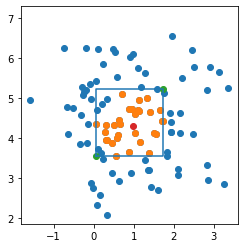

In [180]:
res = find_square_coords(30)